In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dssalaries.csv')

In [3]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
data.shape

(607, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [8]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<AxesSubplot:>

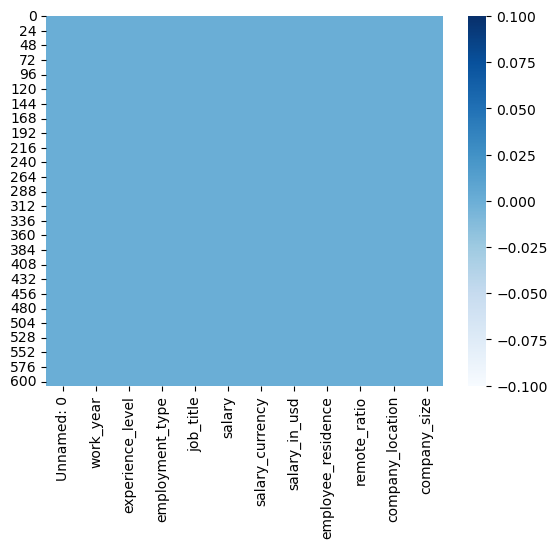

In [9]:
sns.heatmap(data.isnull(),cmap = 'Blues')

In [10]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
valuecounts = {column : data[column].value_counts for column in data.columns}
valuecounts

{'work_year': <bound method IndexOpsMixin.value_counts of 0      2020
 1      2020
 2      2020
 3      2020
 4      2020
        ... 
 602    2022
 603    2022
 604    2022
 605    2022
 606    2022
 Name: work_year, Length: 607, dtype: int64>,
 'experience_level': <bound method IndexOpsMixin.value_counts of 0      MI
 1      SE
 2      SE
 3      MI
 4      SE
        ..
 602    SE
 603    SE
 604    SE
 605    SE
 606    MI
 Name: experience_level, Length: 607, dtype: object>,
 'employment_type': <bound method IndexOpsMixin.value_counts of 0      FT
 1      FT
 2      FT
 3      FT
 4      FT
        ..
 602    FT
 603    FT
 604    FT
 605    FT
 606    FT
 Name: employment_type, Length: 607, dtype: object>,
 'job_title': <bound method IndexOpsMixin.value_counts of 0                  Data Scientist
 1      Machine Learning Scientist
 2               Big Data Engineer
 3            Product Data Analyst
 4       Machine Learning Engineer
                   ...            
 602       

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
data['company_location'] = le.fit_transform(data['company_location'])

Text(0.5, 0, 'salary in usd')

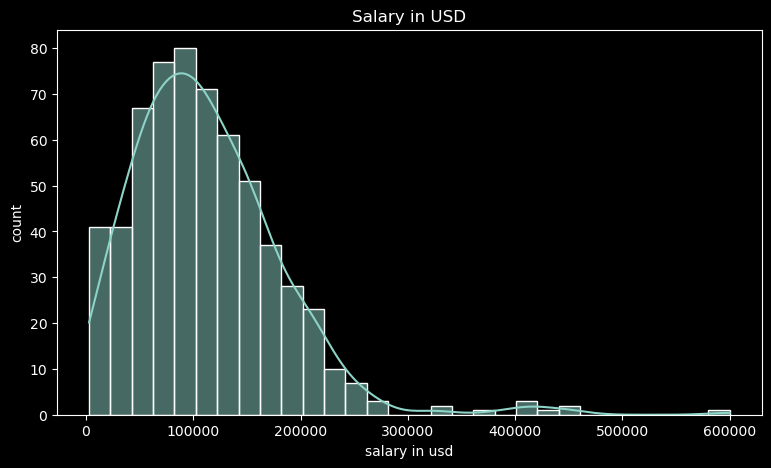

In [14]:
plt.style.use('dark_background')
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.histplot(data['salary_in_usd'],kde=True,bins=30)
plt.title('Salary in USD')
plt.ylabel('count')
plt.xlabel('salary in usd')

Text(0, 0.5, 'count')

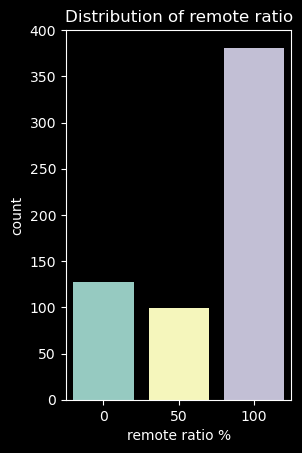

In [15]:
plt.subplot(1,2,2)
sns.countplot('remote_ratio',data=data)
plt.title('Distribution of remote ratio')
plt.xlabel('remote ratio %')
plt.ylabel('count')

<AxesSubplot:xlabel='experience_level', ylabel='count'>

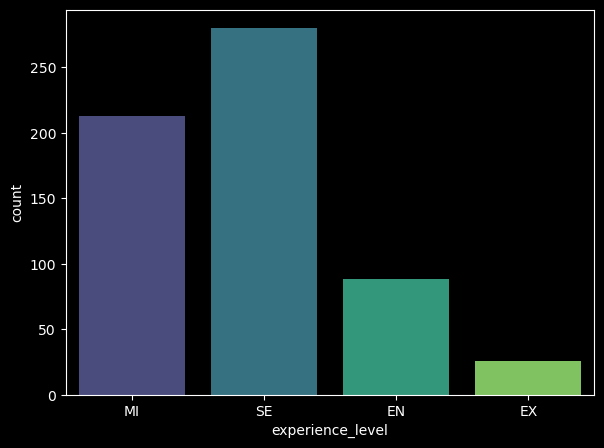

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot('experience_level',data=data,palette='viridis')

Text(0, 0.5, 'Count')

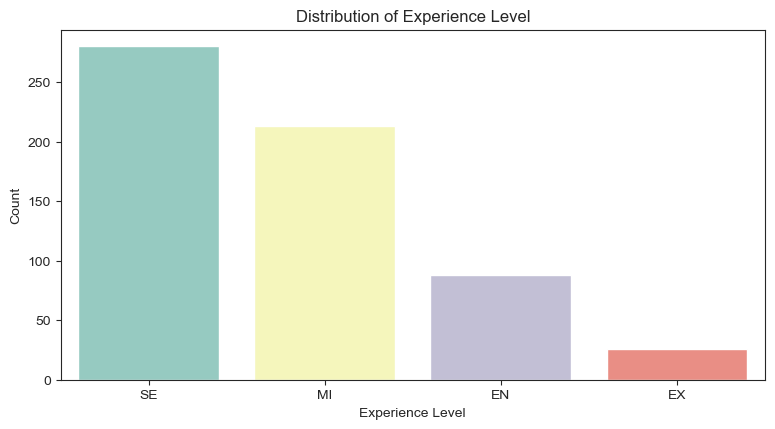

In [17]:
sns.set_style('ticks')

plt.figure(figsize=(20, 10))


plt.subplot(2, 2, 1)
sns.countplot(x='experience_level', data=data, order=data['experience_level'].value_counts().index)
plt.title('Distribution of Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

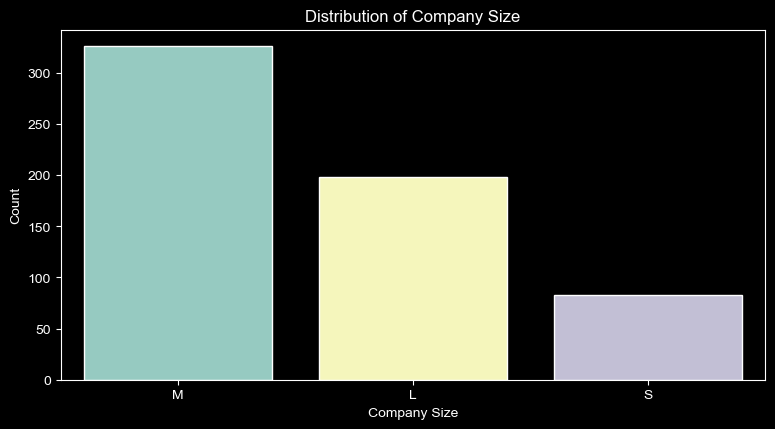

In [18]:
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 3)
sns.countplot(x='company_size', data=data, order=data['company_size'].value_counts().index)
plt.title('Distribution of Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')

Text(0, 0.5, 'Job Title')

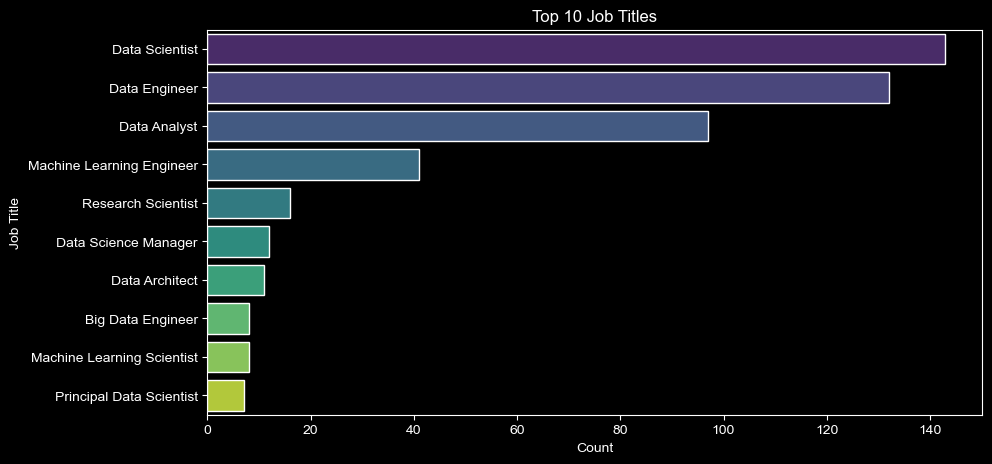

In [63]:
# Since there are many job titles, we'll just display the top 10 for clarity
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
top_job_titles = data['job_title'].value_counts().head(10).index
sns.countplot(y='job_title', data=data, order=top_job_titles,palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')

Text(0.5, 1.0, 'experience vs salary')

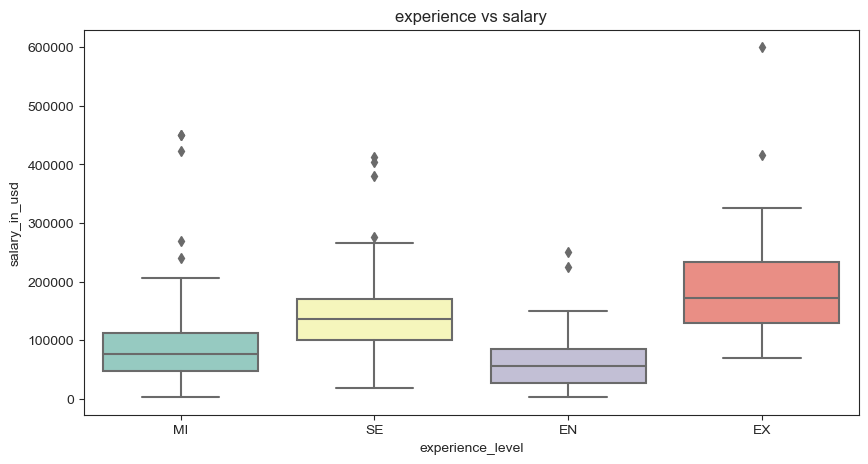

In [20]:
sns.set_style('ticks')
plt.figure(figsize=(10,5))

sns.boxplot(x='experience_level',y='salary_in_usd',data=data)
plt.title('experience vs salary')

Text(0.5, 1.0, 'salary vs employment type')

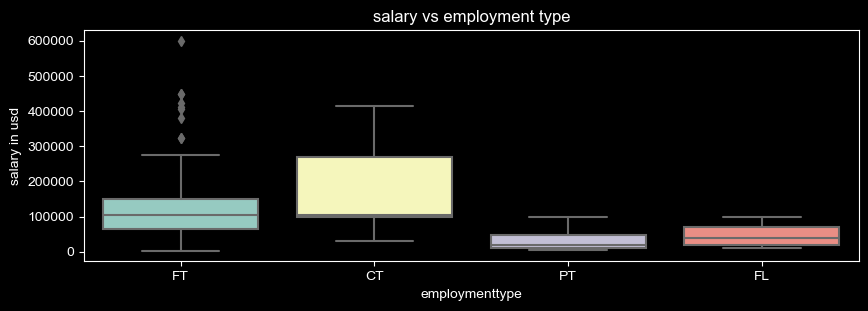

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(10,3))

sns.boxplot(x='employment_type',y='salary_in_usd',data=data)
plt.xlabel('employmenttype')
plt.ylabel('salary in usd')
plt.title('salary vs employment type')

<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

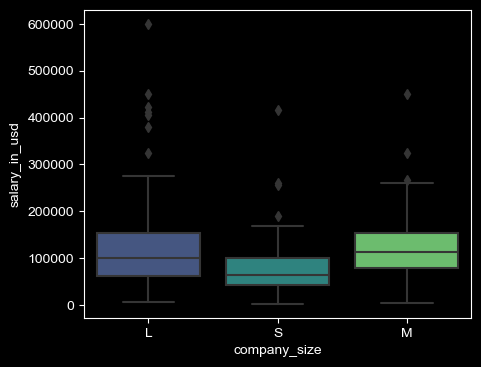

In [22]:
plt.figure(figsize=(5,4))
sns.boxplot(x='company_size',y='salary_in_usd',data = data,palette='viridis')

Text(0.5, 1.0, 'salary vs remote ratio')

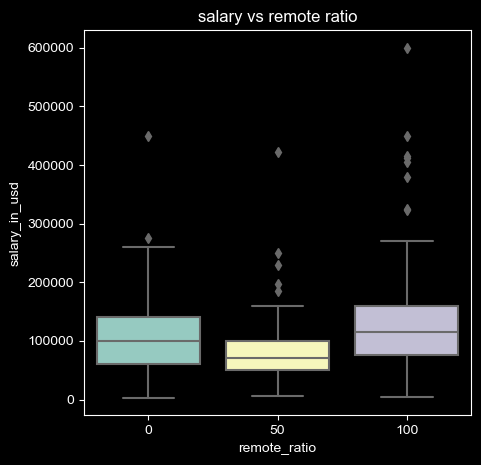

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(x='remote_ratio',y='salary_in_usd',data=data)
plt.title('salary vs remote ratio')

Text(0.5, 1.0, 'correlation heatmap')

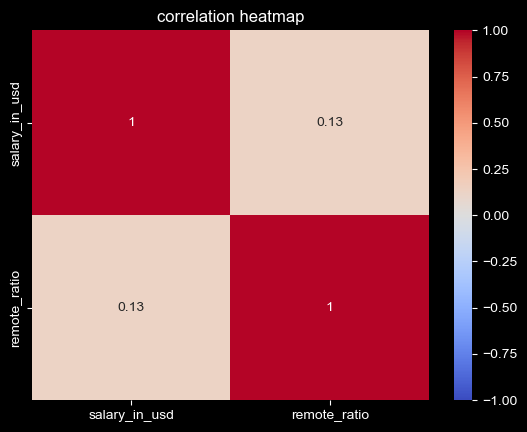

In [24]:
corr = data[['salary_in_usd','remote_ratio']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('correlation heatmap')

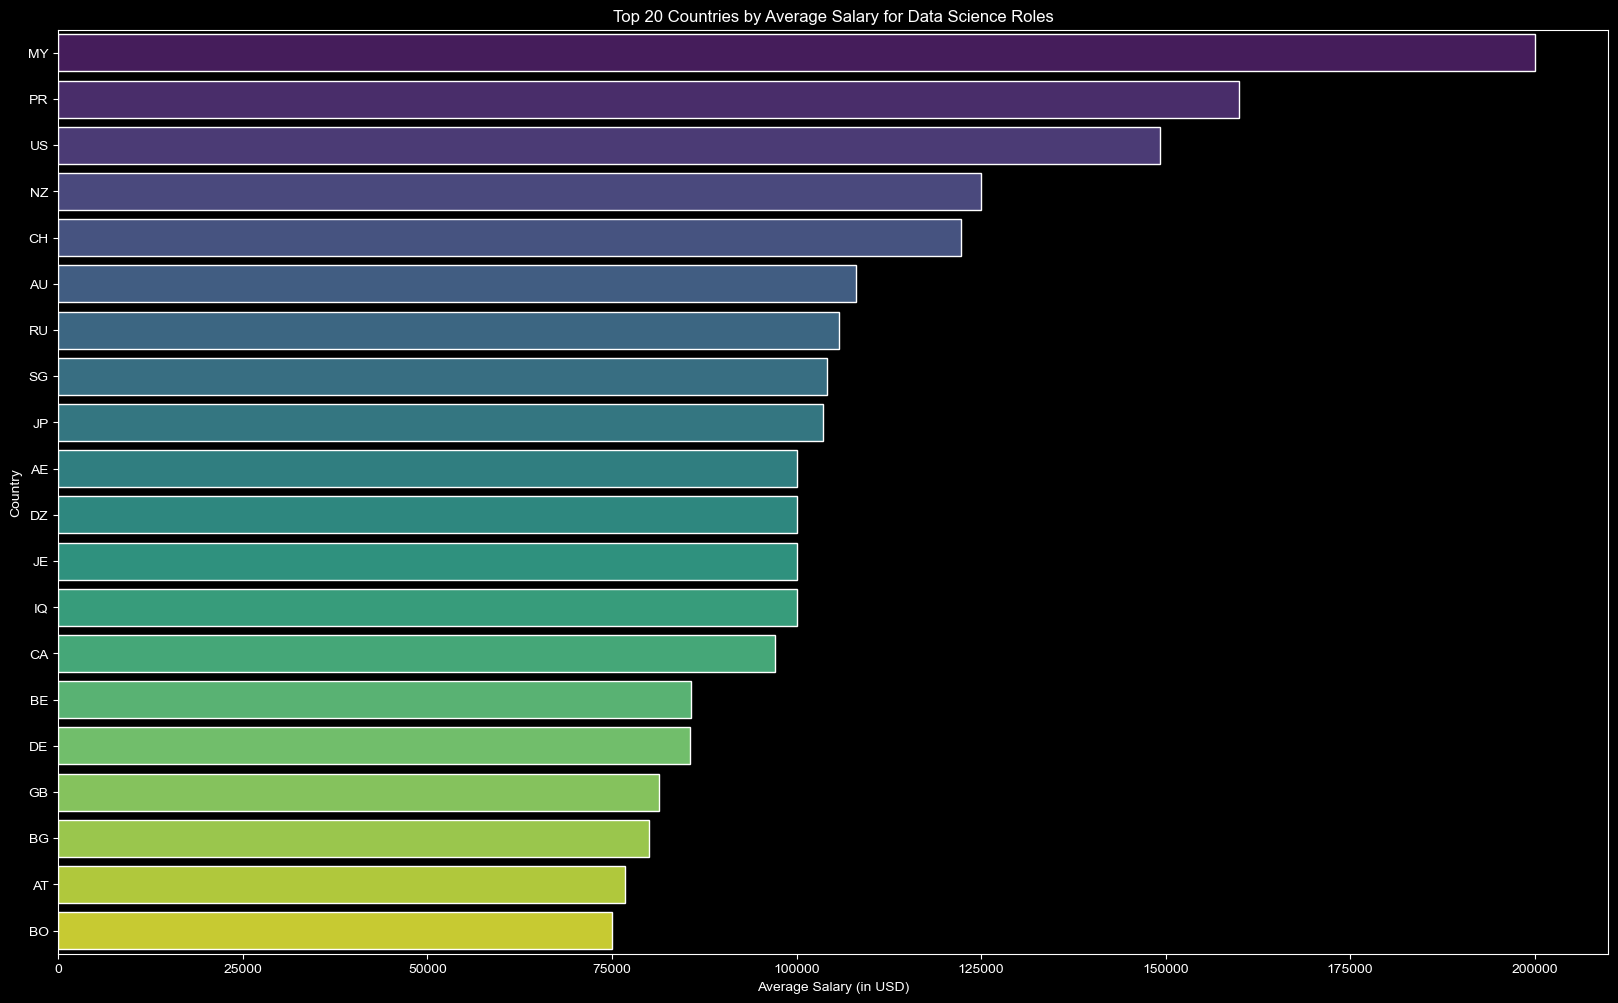

In [25]:
country_analysis = data.groupby('employee_residence').agg({'salary_in_usd': ['mean', 'count']}).reset_index()
country_analysis.columns = ['Country', 'Average Salary', 'Job Listings']


country_analysis = country_analysis.sort_values(by='Average Salary', ascending=False)

 
plt.figure(figsize=(20, 12))
sns.barplot(x='Average Salary', y='Country', data=country_analysis.head(20), palette="viridis")
plt.title('Top 20 Countries by Average Salary for Data Science Roles')
plt.xlabel('Average Salary (in USD)')
plt.ylabel('Country')
plt.show()

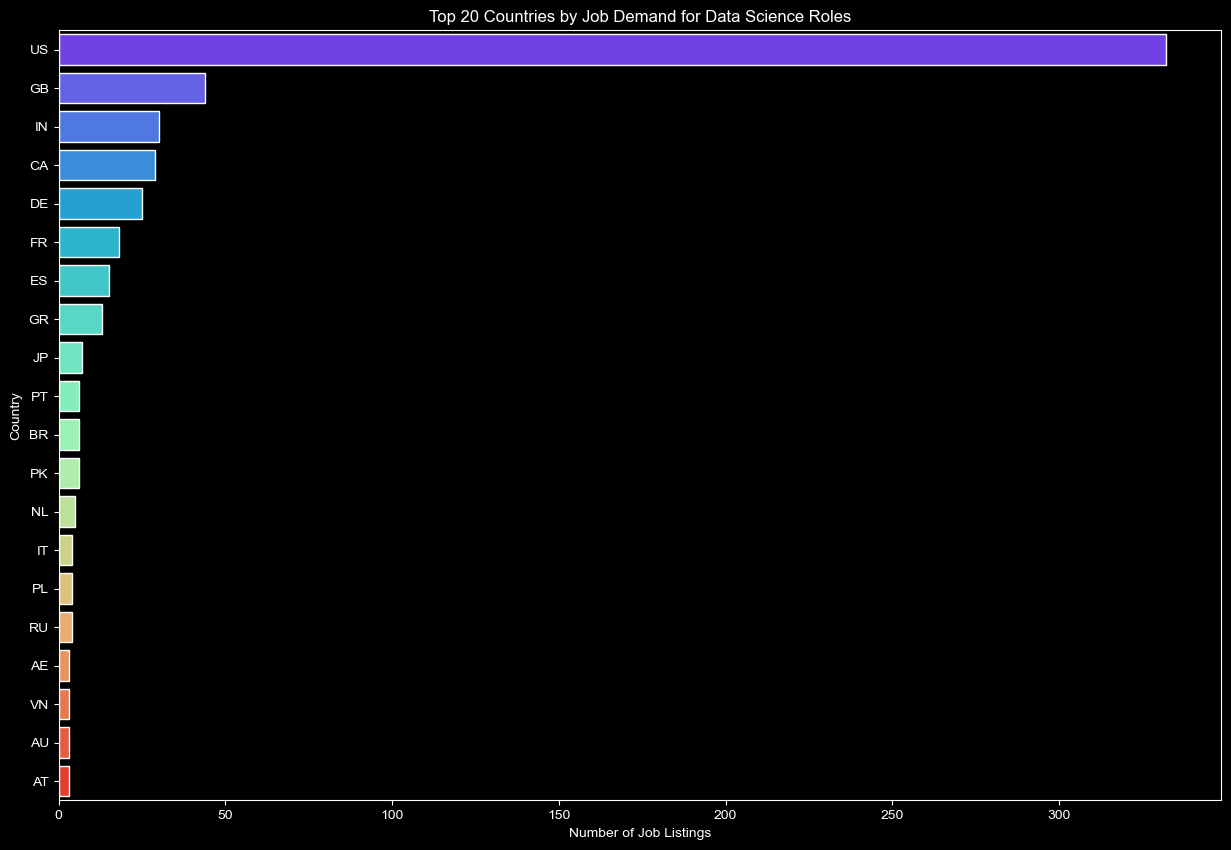

In [48]:
# Sorting by job listings to get countries with the highest demand
country_analysis_sorted_by_demand = country_analysis.sort_values(by='Job Listings', ascending=False)

# Plotting the job demand by country
plt.figure(figsize=(15, 10))
sns.barplot(x='Job Listings', y='Country', data=country_analysis_sorted_by_demand.head(20), palette="rainbow")
plt.title('Top 20 Countries by Job Demand for Data Science Roles')
plt.xlabel('Number of Job Listings')
plt.ylabel('Country')
plt.show()

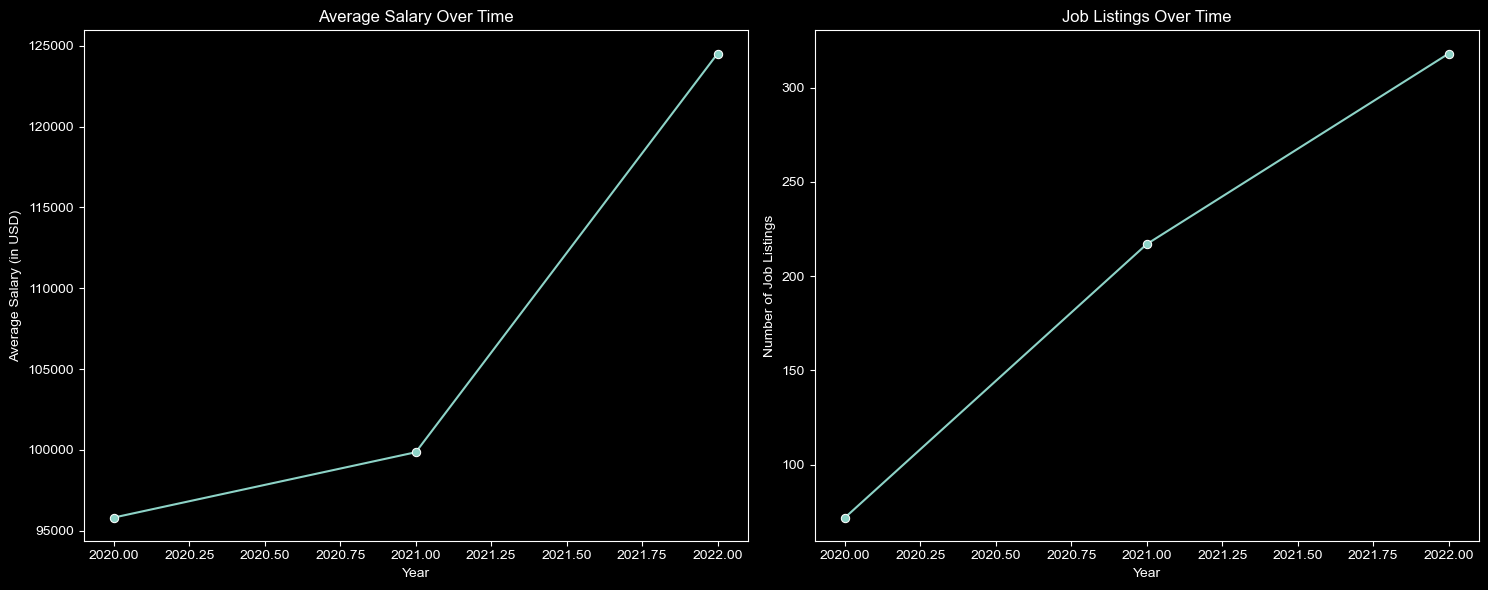

In [27]:

yearly_analysis = data.groupby('work_year').agg({'salary_in_usd': ['mean', 'count']}).reset_index()yearly_analysis.columns = ['Year', 'Average Salary', 'Job Listings']


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='Average Salary', data=yearly_analysis, marker='o')
plt.title('Average Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary (in USD)')

# Job Listings over Time
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='Job Listings', data=yearly_analysis, marker='o')
plt.title('Job Listings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Job Listings')

plt.tight_layout()
plt.show()

In [28]:
yearly_analysis

,Year,Average Salary,Job Listings
0,2020,95813.000000,72
1,2021,99853.792627,217
2,2022,124522.006289,318


<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

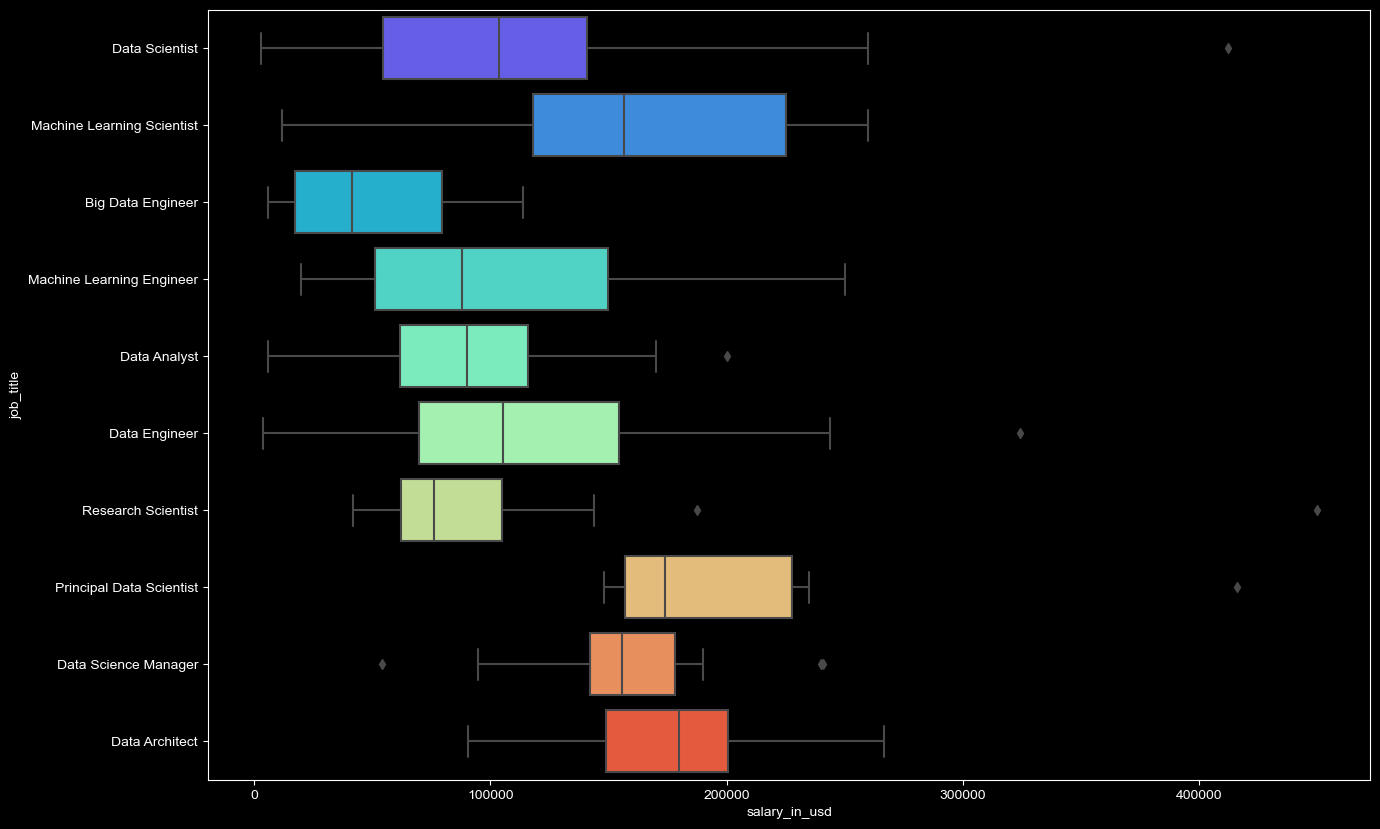

In [49]:
top_job_titles = data['job_title'].value_counts().head(10).index

top_10_titles = data[data['job_title'].isin(top_job_titles)]

plt.figure(figsize=(15,10))
sns.boxplot(x='salary_in_usd',y='job_title',data=top_10_titles,palette='rainbow')

<AxesSubplot:xlabel='count', ylabel='job_title'>

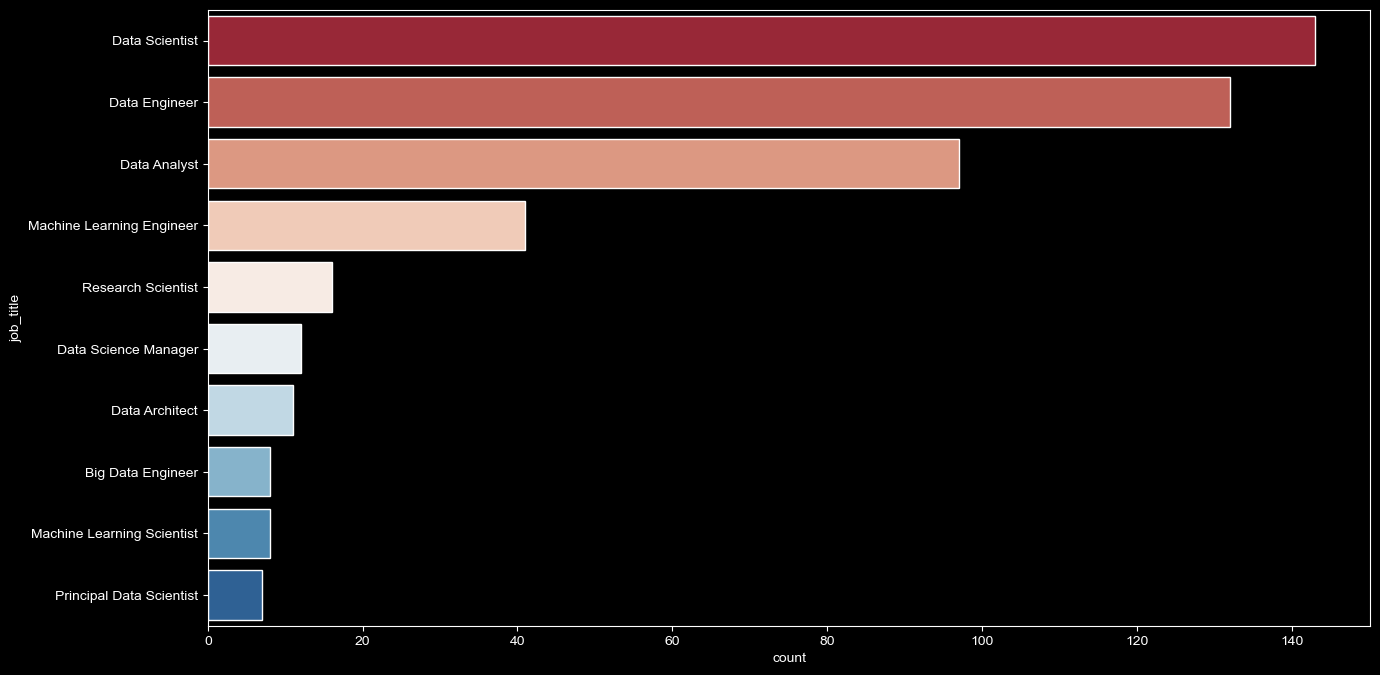

In [50]:
plt.figure(figsize=(15, 8))
sns.countplot(y='job_title', data=top_10_titles, order=top_job_titles, palette="RdBu")

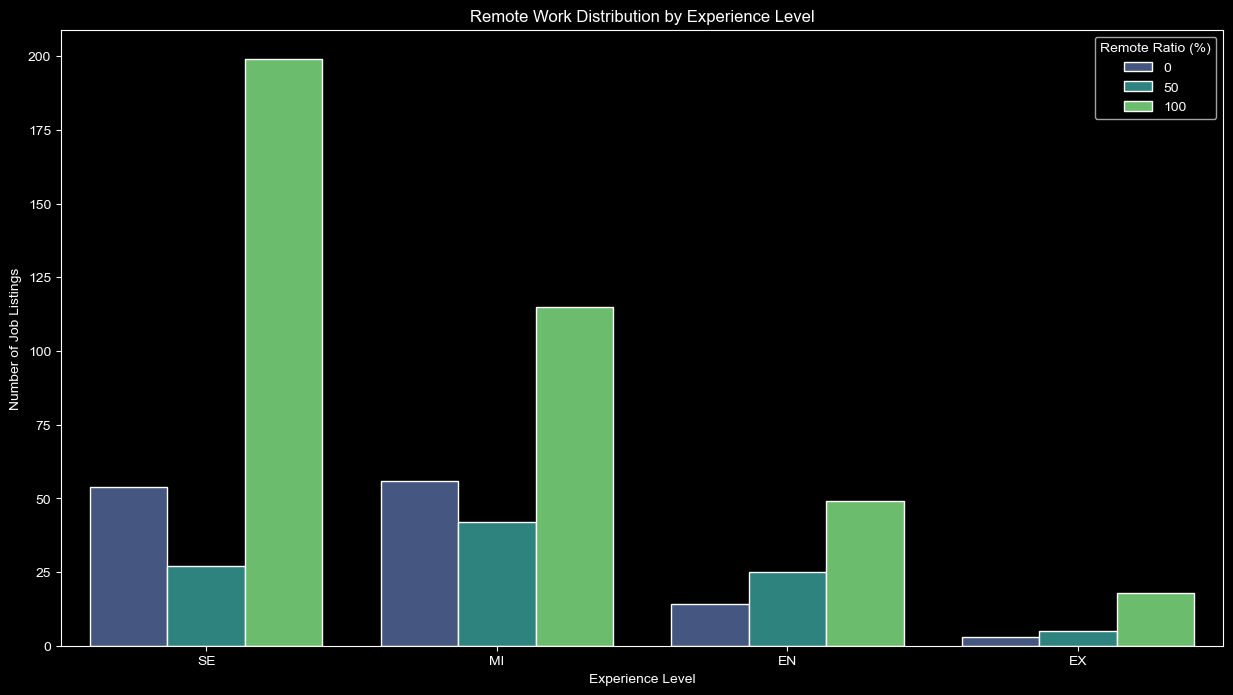

In [58]:
plt.figure(figsize=(15, 8))
sns.countplot(x='experience_level', hue='remote_ratio', data=data, palette="viridis", order=['SE', 'MI', 'EN', 'EX'])
plt.title('Remote Work Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Listings')
plt.legend(title='Remote Ratio (%)')

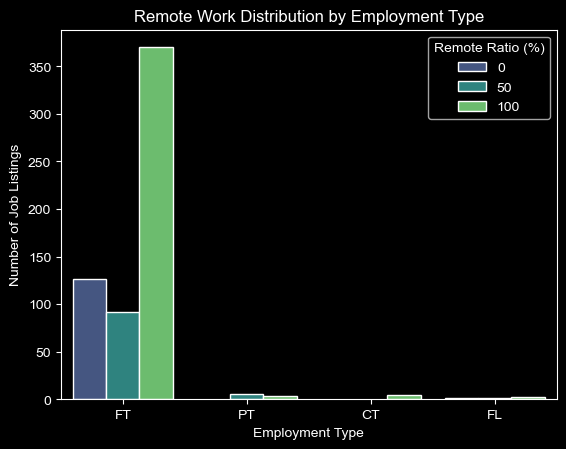

In [62]:
sns.countplot(x='employment_type', hue='remote_ratio', data=data, palette="viridis", order=['FT', 'PT', 'CT', 'FL'])
plt.title('Remote Work Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Job Listings')
plt.legend(title='Remote Ratio (%)')